In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                          centers=4,
                          cluster_std=[1.0, 2.5, 0.5, 3.0],
                          random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X
#PRVI ZADATAK
#---------------------------------------------------------------

np.random.seed() 
data_train=generate_data(500,1) 

numOfClusters = int(input("Unesite broj klastera: (Max 10): "))
km = KMeans(n_clusters=numOfClusters
            , init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_kmeans = km.fit_predict(data_train)
colors = ['lightblue', 'green', 'red','yellow','aqua','darkorange', 'lime','azure','magenta','indigo']
markers=['.','o','h','*','d','<','>','s','p','^']
markCounter=0
colorCounter=0
for i in range(0,numOfClusters):
    if(colorCounter == numOfClusters or markCounter== numOfClusters):
        markCounter = 0
        colorCounter= 0
    plt.scatter(data_train[y_kmeans==i,0],data_train[y_kmeans == i,1],s=50,c=colors[colorCounter],marker=markers[markCounter],edgecolors='black')
    markCounter = markCounter+1
    colorCounter = colorCounter+1
    
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=100, marker='D',
    c='gold', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()
#---------------------------------------------------------------
#DRUGI ZADATAK
plt.figure(1)
distortions = []
for i in range(1, 20):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(data_train)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Broj klastera')
plt.ylabel('Vrijednost kriterijske funkcije')
plt.show()
#---------------------------------------------------------------
#TRECI ZADATAK

scipyField = linkage(data_train,'ward')
# calculate full dendrogram
plt.figure(2)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    scipyField,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=7.,  # font size for the x axis labels
)
plt.show()


Unesite broj klastera: (Max 10): 5


[[0.7685543  0.7685543  0.7685543  ... 0.7685543  0.7685543  0.7685543 ]
 [0.7685543  0.7685543  0.7685543  ... 0.7685543  0.7685543  0.7685543 ]
 [0.7685543  0.7685543  0.7685543  ... 0.7685543  0.7685543  0.7685543 ]
 ...
 [0.56618863 0.56618863 0.56618863 ... 0.41428396 0.41428396 0.23106134]
 [0.56618863 0.56618863 0.56618863 ... 0.41428396 0.41428396 0.23106134]
 [0.56618863 0.56618863 0.56618863 ... 0.41428396 0.41428396 0.23106134]]


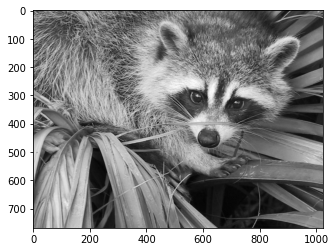

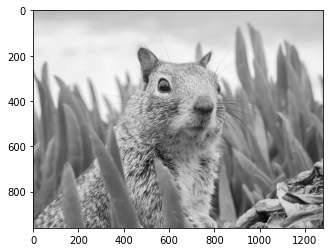

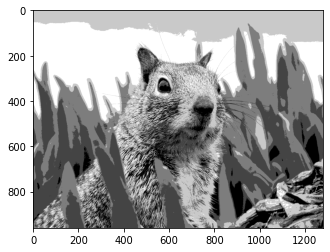

In [2]:
import scipy as sp
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc
    face = misc.face(gray=True)   
X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=5,n_init=1)
k_means.fit(X) 
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

plt.figure(1)
plt.imshow(face,  cmap='gray')

plt.figure(2)
plt.imshow(face_compressed,  cmap='gray')

image = mpimg.imread('example_grayscale.png') 
Slika = image.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means2 = cluster.KMeans(n_clusters=5,n_init=1)
k_means2.fit(Slika) 
values = k_means2.cluster_centers_.squeeze()
labels = k_means2.labels_
Slika_compressed = np.choose(labels, values)
Slika_compressed.shape = image.shape
print(Slika_compressed)

plt.figure(3)
plt.imshow(image,  cmap='gray')

plt.figure(4)
plt.imshow(Slika_compressed,  cmap='gray')


In [ ]:
import scipy as sp
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc
    face = misc.face(gray=True)   
X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=5,n_init=1)
k_means.fit(X) 
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

plt.figure(1)
plt.imshow(face,  cmap='gray')

plt.figure(2)
plt.imshow(face_compressed,  cmap='gray')

image = mpimg.imread('example.png') 
Slika = image.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means2 = cluster.KMeans(n_clusters=5,n_init=1)
k_means2.fit(Slika) 
values = k_means2.cluster_centers_.squeeze()
labels = k_means2.labels_
Slika_compressed = np.choose(labels, values)
Slika_compressed.shape = image.shape


plt.figure(3)
plt.imshow(image,  cmap='gray')

plt.figure(4)
plt.imshow(Slika_compressed,  cmap='gray')
